In [ ]:
import numpy.polynomial.polynomial as poly
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/BTC-USD (2).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/26/2017,14036.59961,16461.19922,14028.90039,16099.80,16099.79981,1.345430e+10
1,12/27/2017,16163.50000,16930.90039,15114.29981,15838.50,15838.50000,1.248760e+10
2,12/28/2017,15864.09961,15888.40039,13937.29981,14606.50,14606.50000,1.233650e+10
3,12/29/2017,14695.79981,15279.00000,14307.00000,14656.20,14656.20020,1.302550e+10
4,12/30/2017,14681.90039,14681.90039,12350.09961,12952.20,12952.20020,1.445260e+10
...,...,...,...,...,...,...,...
1822,12/22/2022,16818.38086,16866.67383,16592.40820,16830.34,16830.34180,1.644157e+10
1823,12/23/2022,16829.64453,16905.21875,16794.45898,16796.95,16796.95313,1.532927e+10
1824,12/24/2022,16796.97656,16864.70313,16793.52734,16847.76,16847.75586,9.744636e+09
1825,12/25/2022,16847.50586,16860.55469,16755.25391,16841.99,16841.98633,1.165638e+10


In [ ]:
df = df[['Date', 'Close']]
df.tail()

,Date,Close
1822,12/22/2022,16830.34
1823,12/23/2022,16796.95
1824,12/24/2022,16847.76
1825,12/25/2022,16841.99
1826,12/26/2022,16848.80


Using index to build time series model


In [ ]:
df['Time'] = np.arange(len(df.index))
df.head()

<ipython-input-4-7be0ded9e9b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = np.arange(len(df.index))


,Date,Close,Time
0,12/26/2017,16099.8,0
1,12/27/2017,15838.5,1
2,12/28/2017,14606.5,2
3,12/29/2017,14656.2,3
4,12/30/2017,12952.2,4


In [ ]:
df['Date_New'] = pd.to_datetime(df.Date)
type(df['Date_New'])

<ipython-input-20-a1d1c68ad423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_New'] = pd.to_datetime(df.Date)


pandas.core.series.Series

In [ ]:
df.index = df['Date_New']
df

,Date,Close,Time,Date_New
Date_New,,,,
2017-12-26,12/26/2017,16099.80,0,2017-12-26
2017-12-27,12/27/2017,15838.50,1,2017-12-27
2017-12-28,12/28/2017,14606.50,2,2017-12-28
2017-12-29,12/29/2017,14656.20,3,2017-12-29
2017-12-30,12/30/2017,12952.20,4,2017-12-30
...,...,...,...,...
2022-12-22,12/22/2022,16830.34,1822,2022-12-22
2022-12-23,12/23/2022,16796.95,1823,2022-12-23
2022-12-24,12/24/2022,16847.76,1824,2022-12-24


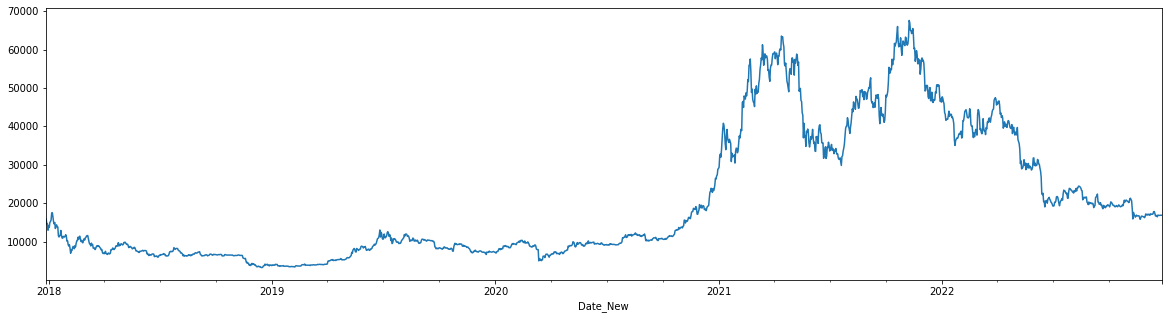

In [ ]:
df['Close'].plot(figsize=(20,5))

In [ ]:
no_of_predictions = 30
Date_future = pd.date_range(start = "27/12/2022",end = "25/01/2023")
X = np.array(df.Time, dtype = float)
y = np.array(df.Close, dtype = float)
Z = [1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865]

In [ ]:
coefs = poly.polyfit(X, y, 9)
x_new = np.linspace(X[0], X[-1] + no_of_predictions, num = len(X) + no_of_predictions)
ffit = poly.polyval(x_new, coefs)
fit = poly.polyval(y, coefs)
pred = poly.polyval(Z, coefs)
predictions = pd.DataFrame(Date_future,pred)
print(predictions)

                      0
14950.833660 2022-12-27
14824.213851 2022-12-28
14694.311882 2022-12-29
14561.055286 2022-12-30
14424.370718 2022-12-31
14284.183944 2023-01-01
14140.419842 2023-01-02
13993.002387 2023-01-03
13841.854648 2023-01-04
13686.898783 2023-01-05
13528.056028 2023-01-06
13365.246693 2023-01-07
13198.390153 2023-01-08
11288.809187 2023-01-09
11071.837975 2023-01-10
10849.776624 2023-01-11
10622.531719 2023-01-12
10390.008806 2023-01-13
10152.112388 2023-01-14
9908.745918  2023-01-15
9659.811792  2023-01-16
9405.211339  2023-01-17
9144.844814  2023-01-18
8878.611392  2023-01-19
8606.409159  2023-01-20
8328.135102  2023-01-21
8043.685107  2023-01-22
7752.953944  2023-01-23
7455.835266  2023-01-24
7152.221595  2023-01-25


In [ ]:
date_new = df.index.append(Date_future)
date_new

DatetimeIndex(['2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04',
               ...
               '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23',
               '2023-01-24', '2023-01-25'],
              dtype='datetime64[ns]', length=1857, freq=None)

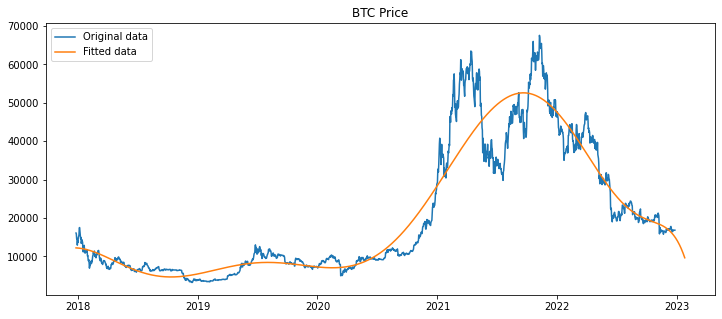

In [ ]:
plt.figure(figsize = (12,5))
plt.title('BTC Price')
plt.plot(df['Date_New'], y, label = "Original data")
plt.plot(date_new, ffit, label = "Fitted data")
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mape = mean_absolute_percentage_error(df['Close'],fit)
mae = mean_absolute_error(df['Close'],fit)
print("MAPE: ", mape * 100)
print("MAE: ", mae)


MAPE:  7.438662103343844e+17
MAE:  4.263005275345331e+20


In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Close'],fit)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)


RMSE:  1.5866956816550142e+21
